In [1]:
from google.colab import files
uploaded = files.upload()

Saving freemium_users_dataset.csv to freemium_users_dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv("freemium_users_dataset.csv")
df.head()

,user_id,signup_date,device,country,sessions,feature_A_used,feature_B_used,support_tickets,converted_to_paid,conversion_date
0,1,2023-04-13,Mobile,Nigeria,9,1,1,0,1,2023-06-04
1,2,2023-02-22,Desktop,Nigeria,9,1,0,0,0,NaN
2,3,2023-06-19,Desktop,Kenya,6,1,0,1,0,NaN
3,4,2023-02-20,Mobile,Nigeria,7,1,0,0,0,NaN
4,5,2023-04-02,Desktop,USA,6,1,1,0,0,NaN


In [3]:
print("shape:", df.shape)

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDevice breakdown:")
print(df['device'].value_counts())

print("\nCountry breakdown:")
print(df['country'].value_counts())

print("\nConverted to paid breakdown:")
print(df['converted_to_paid'].value_counts())

shape: (10000, 10)

Data Types:
user_id               int64
signup_date          object
device               object
country              object
sessions              int64
feature_A_used        int64
feature_B_used        int64
support_tickets       int64
converted_to_paid     int64
conversion_date      object
dtype: object

Missing Values:
user_id                 0
signup_date             0
device                  0
country                 0
sessions                0
feature_A_used          0
feature_B_used          0
support_tickets         0
converted_to_paid       0
conversion_date      9480
dtype: int64

Device breakdown:
device
Mobile     6518
Desktop    3482
Name: count, dtype: int64

Country breakdown:
country
Nigeria    2974
Kenya      2027
USA        2010
Germany    1982
India      1007
Name: count, dtype: int64

Converted to paid breakdown:
converted_to_paid
0    9480
1     520
Name: count, dtype: int64


In [4]:
#Convert signup_date and conversion_date
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['conversion_date'] = pd.to_datetime(df['conversion_date'])

#create days to convert
df['days_to_convert'] = (df['conversion_date'] - df['signup_date']).dt.days

#Feature Selection + Train/Test Split

###Prepare X and y

In [5]:
from sklearn.model_selection import train_test_split

#  Select features and target
features = ['device', 'country', 'sessions', 'feature_A_used', 'feature_B_used', 'support_tickets']
target = 'converted_to_paid'

X = df[features]
y = df[target]

#  One-hot encode categorical variables
X = pd.get_dummies(X, columns=['device', 'country'], drop_first=True)

#  Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


##Logistic Regression + Evaluation

###Train & Evaluate

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 2. Predict on test set
y_pred = model.predict(X_test)

# 3. Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1896    0]
 [ 104    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1896
           1       0.00      0.00      0.00       104

    accuracy                           0.95      2000
   macro avg       0.47      0.50      0.49      2000
weighted avg       0.90      0.95      0.92      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


>check accuracy

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.948

###Feature Importance

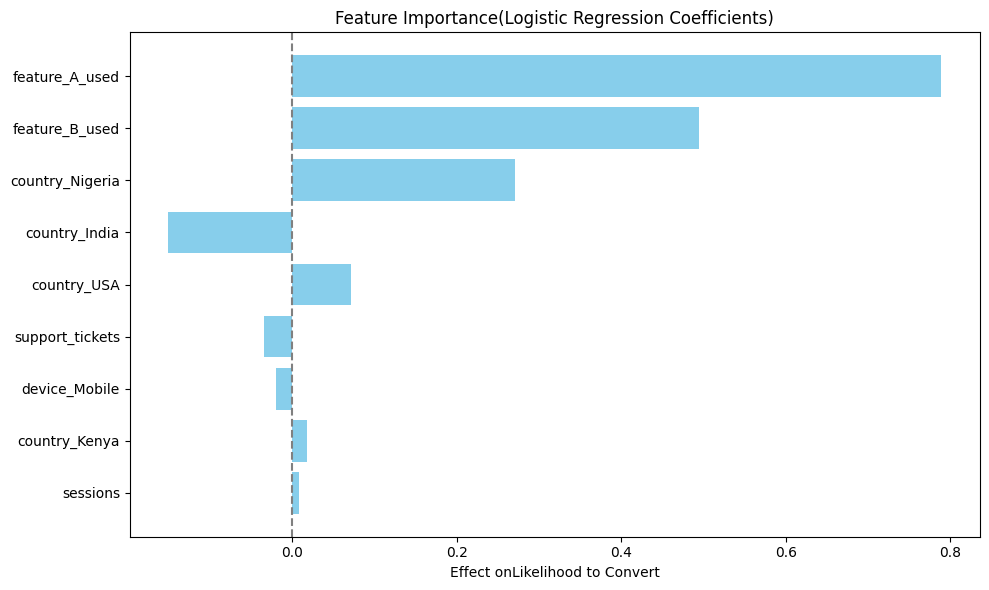

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#get feature importance
importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
})

#sort by absolute impact
importance['abs_coef'] = importance['coefficient'].abs()
importance = importance.sort_values('abs_coef', ascending=False)

#plot
plt.figure(figsize=(10, 6))
plt.barh(importance['feature'], importance['coefficient'], color='skyblue')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Effect onLikelihood to Convert')
plt.title('Feature Importance(Logistic Regression Coefficients)')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()